In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#loading data set
df = pd.read_excel('cis_carbo_data.xlsx')

In [3]:
df.shape

(1792, 28)

In [4]:
df.head()

,Health System Name,Health System Entity Code,Facility,Facility Name,Premier Entity Code,Premier Contract Number,NDC,Label Name,Supplier,Wholesaler,...,Total Units Excluding 340B WAC,Total Spend Excluding 340B WAC,Last Price Paid Date,Last Price Paid,WAC Units,WAC Spend,340B Units,340B Spend,Total Units,Total Spend
0,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH18AHC01,16729028811,CISPLATIN 50 MG/50 ML VIAL,ACCORD HEALTHCA,McKesson,...,0,0.00,2022-10-27,6.27,0,0.00,2,12.04,2,12.04
1,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH18AHC01,16729029533,CARBOPLATIN 150 MG/15 ML VIAL,ACCORD HEALTHCA,McKesson,...,1,7.56,2022-11-10,7.56,0,0.00,0,0.00,1,7.56
2,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424401,CARBOPLATIN 50 MG/5 ML VIAL,TEVA PARENTERAL,McKesson,...,1,4.39,2023-04-28,4.39,0,0.00,0,0.00,1,4.39
3,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424401,CARBOPLATIN 50 MG/5 ML VIAL,TEVA PARENTERAL,McKesson,...,0,0.00,2023-04-28,7.29,4,29.16,0,0.00,4,29.16
4,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424601,CARBOPLATIN 150 MG/15 ML VIAL,TEVA PARENTERAL,McKesson,...,6,50.16,2023-02-20,8.36,0,0.00,0,0.00,6,50.16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Health System Name              1792 non-null   object        
 1   Health System Entity Code       1792 non-null   object        
 2   Facility                        1792 non-null   object        
 3   Facility Name                   1792 non-null   object        
 4   Premier Entity Code             1792 non-null   object        
 5   Premier Contract Number         1584 non-null   object        
 6   NDC                             1792 non-null   int64         
 7   Label Name                      1792 non-null   object        
 8   Supplier                        1792 non-null   object        
 9   Wholesaler                      1792 non-null   object        
 10  Wholesaler Account Number       1792 non-null   object        
 11  Whol

In [6]:
df.describe()

,NDC,Pkg Qty,Pkg Size,Total Units Excluding 340B WAC,Total Spend Excluding 340B WAC,Last Price Paid Date,Last Price Paid,WAC Units,WAC Spend,340B Units,340B Spend,Total Units,Total Spend
count,1.792000e+03,1792.000000,1792.000000,1792.000000,1792.000000,1768,1768.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,1.481274e+10,1.180804,66.570871,6.347656,117.073364,2023-05-16 21:04:53.212669696,18.415193,0.914621,29.721549,6.629464,111.386470,13.891741,258.181383
min,1.439504e+08,1.000000,5.000000,-6.000000,-21.360000,2022-08-10 00:00:00,4.070000,-1.000000,-21.660000,-4.000000,-63.360000,-6.000000,-63.360000
25%,7.034244e+08,1.000000,45.000000,0.000000,0.000000,2023-04-10 00:00:00,10.212500,0.000000,0.000000,0.000000,0.000000,1.000000,15.420000
50%,7.035747e+08,1.000000,60.000000,0.000000,0.000000,2023-06-01 00:00:00,16.750000,0.000000,0.000000,0.000000,0.000000,4.000000,54.307000
75%,1.672903e+10,1.000000,100.000000,2.000000,35.358500,2023-07-25 00:00:00,23.340000,0.000000,0.000000,3.000000,41.485000,10.000000,168.842500
max,6.944800e+10,10.000000,200.000000,405.000000,9452.700000,2023-09-25 00:00:00,150.480000,100.000000,4395.000000,682.000000,14357.380000,682.000000,14357.380000
std,2.208617e+10,1.263104,37.911362,28.279162,587.817732,NaN,12.951570,5.485779,211.920630,26.034959,522.651839,37.412060,789.887144


In [7]:
#looking for missing values
print(df.isnull().sum())

Health System Name                  0
Health System Entity Code           0
Facility                            0
Facility Name                       0
Premier Entity Code                 0
Premier Contract Number           208
NDC                                 0
Label Name                          0
Supplier                            0
Wholesaler                          0
Wholesaler Account Number           0
Wholesaler Purchase Type            0
Brand Name                          0
Generic Name                        0
Strength                            0
Pkg Qty                             0
Pkg Size                            0
Drug Form Code                      0
Total Units Excluding 340B WAC      0
Total Spend Excluding 340B WAC      0
Last Price Paid Date               24
Last Price Paid                    24
WAC Units                           0
WAC Spend                           0
340B Units                          0
340B Spend                          0
Total Units 

In [8]:
#missing values in Premier Contract Number
df['Premier Contract Number'] = df['Premier Contract Number'].fillna('Not available')

In [9]:
#missing values in Last Price Paid Date 
df['Last Price Paid Date ']= df['Last Price Paid Date '].fillna(method='bfill')

In [10]:
#missing values in Last price paid
#df['Last price paid']=df['Last price paid'].fillna
print(df)

               Health System Name Health System Entity Code  \
0      ADVENTIST HEALTHCARE, INC.                    MD0151   
1      ADVENTIST HEALTHCARE, INC.                    MD0151   
2      ADVENTIST HEALTHCARE, INC.                    MD0151   
3      ADVENTIST HEALTHCARE, INC.                    MD0151   
4      ADVENTIST HEALTHCARE, INC.                    MD0151   
...                           ...                       ...   
1787  WOMAN'S HOSPITAL FOUNDATION                    LA0018   
1788  WOMAN'S HOSPITAL FOUNDATION                    LA0018   
1789  WOMAN'S HOSPITAL FOUNDATION                    LA0018   
1790  WOMAN'S HOSPITAL FOUNDATION                    LA0018   
1791  WOMAN'S HOSPITAL FOUNDATION                    LA0018   

                                               Facility  \
0     ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...   
1     ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...   
2     ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...   
3     A

In [11]:
df_carboplatin = df[df['Label Name'].str.contains('CARBOPLATIN', case=False)]

In [12]:
df_carboplatin

,Health System Name,Health System Entity Code,Facility,Facility Name,Premier Entity Code,Premier Contract Number,NDC,Label Name,Supplier,Wholesaler,...,Total Units Excluding 340B WAC,Total Spend Excluding 340B WAC,Last Price Paid Date,Last Price Paid,WAC Units,WAC Spend,340B Units,340B Spend,Total Units,Total Spend
1,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH18AHC01,16729029533,CARBOPLATIN 150 MG/15 ML VIAL,ACCORD HEALTHCA,McKesson,...,1,7.560,2022-11-10,7.560,0,0.00,0,0.00,1,7.560
2,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424401,CARBOPLATIN 50 MG/5 ML VIAL,TEVA PARENTERAL,McKesson,...,1,4.390,2023-04-28,4.390,0,0.00,0,0.00,1,4.390
3,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424401,CARBOPLATIN 50 MG/5 ML VIAL,TEVA PARENTERAL,McKesson,...,0,0.000,2023-04-28,7.290,4,29.16,0,0.00,4,29.160
4,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424601,CARBOPLATIN 150 MG/15 ML VIAL,TEVA PARENTERAL,McKesson,...,6,50.160,2023-02-20,8.360,0,0.00,0,0.00,6,50.160
5,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424801,CARBOPLATIN 450 MG/45 ML VIAL,TEVA PARENTERAL,McKesson,...,6,106.080,2023-08-17,21.610,0,0.00,0,0.00,6,106.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,WOMAN'S HOSPITAL FOUNDATION,LA0018,WOMAN'S HOSPITAL FOUNDATION - LA0018 - FW3388318,WOMAN'S HOSPITAL FOUNDATION,LA0018,PPPH21TEV01,703424801,CARBOPLATIN 450 MG/45 ML VIAL,TEVA PARENTERAL,Morris & Dickson,...,0,0.000,2023-06-13,NaN,0,0.00,0,0.00,0,0.000
1785,WOMAN'S HOSPITAL FOUNDATION,LA0018,WOMAN'S HOSPITAL FOUNDATION - LA0018 - FW3388318,WOMAN'S HOSPITAL FOUNDATION,LA0018,PPPH21TEV01,703424801,CARBOPLATIN 450 MG/45 ML VIAL,TEVA PARENTERAL,Morris & Dickson,...,0,0.000,2023-06-13,19.260,0,0.00,2,38.52,2,38.520
1789,WOMAN'S HOSPITAL FOUNDATION,LA0018,WOMAN'S HOSPITAL FOUNDATION - LA0018 - FW3388318,WOMAN'S HOSPITAL FOUNDATION,LA0018,PPPL24TEV01,703423981,CARBOPLATIN 600 MG/60 ML VIAL,TEVA PARENTERAL,Morris & Dickson,...,2,46.972,2023-05-23,23.486,0,0.00,0,0.00,2,46.972
1790,WOMAN'S HOSPITAL FOUNDATION,LA0018,WOMAN'S HOSPITAL FOUNDATION - LA0018 - FW3388318,WOMAN'S HOSPITAL FOUNDATION,LA0018,PPPL24TEV01,703424881,CARBOPLATIN 450 MG/45 ML VIAL,TEVA PARENTERAL,Morris & Dickson,...,2,35.410,2023-05-24,17.705,0,0.00,0,0.00,2,35.410


In [22]:
# Extracting dosage from the 'Label Name'
df['Dosage_mg'] = df['Label Name'].str.extract(r'(\d+)').astype(float)

# Extracting drug name from the 'Label Name' using regex
df['Drug_Name'] = df['Label Name'].apply(lambda x: re.split(r'\d', x)[0].strip())

df.head()


,Health System Name,Health System Entity Code,Facility,Facility Name,Premier Entity Code,Premier Contract Number,NDC,Label Name,Supplier,Wholesaler,...,Last Price Paid,WAC Units,WAC Spend,340B Units,340B Spend,Total Units,Total Spend,Dosage_mg,Drug_Name,Total_Price_Paid
0,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH18AHC01,16729028811,CISPLATIN 50 MG/50 ML VIAL,ACCORD HEALTHCA,McKesson,...,6.27,0,0.00,2,12.04,2,12.04,50.0,CISPLATIN,12.54
1,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH18AHC01,16729029533,CARBOPLATIN 150 MG/15 ML VIAL,ACCORD HEALTHCA,McKesson,...,7.56,0,0.00,0,0.00,1,7.56,150.0,CARBOPLATIN,7.56
2,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424401,CARBOPLATIN 50 MG/5 ML VIAL,TEVA PARENTERAL,McKesson,...,4.39,0,0.00,0,0.00,1,4.39,50.0,CARBOPLATIN,4.39
3,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424401,CARBOPLATIN 50 MG/5 ML VIAL,TEVA PARENTERAL,McKesson,...,7.29,4,29.16,0,0.00,4,29.16,50.0,CARBOPLATIN,29.16
4,"ADVENTIST HEALTHCARE, INC.",MD0151,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER ...,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,808469,PPPH21TEV01,703424601,CARBOPLATIN 150 MG/15 ML VIAL,TEVA PARENTERAL,McKesson,...,8.36,0,0.00,0,0.00,6,50.16,150.0,CARBOPLATIN,50.16


In [27]:
 df_cleaned =df[['Health System Name','Supplier', 'Drug_Name', 'Dosage_mg', 'Total Units', 'Total_Price_Paid']]

In [28]:
df_cleaned

,Health System Name,Supplier,Drug_Name,Dosage_mg,Total Units,Total_Price_Paid
0,"ADVENTIST HEALTHCARE, INC.",ACCORD HEALTHCA,CISPLATIN,50.0,2,12.540
1,"ADVENTIST HEALTHCARE, INC.",ACCORD HEALTHCA,CARBOPLATIN,150.0,1,7.560
2,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,50.0,1,4.390
3,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,50.0,4,29.160
4,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,150.0,6,50.160
...,...,...,...,...,...,...
1787,WOMAN'S HOSPITAL FOUNDATION,TEVA PARENTERAL,CISPLATIN,100.0,3,56.412
1788,WOMAN'S HOSPITAL FOUNDATION,TEVA PARENTERAL,CISPLATIN,100.0,15,252.180
1789,WOMAN'S HOSPITAL FOUNDATION,TEVA PARENTERAL,CARBOPLATIN,600.0,2,46.972
1790,WOMAN'S HOSPITAL FOUNDATION,TEVA PARENTERAL,CARBOPLATIN,450.0,2,35.410


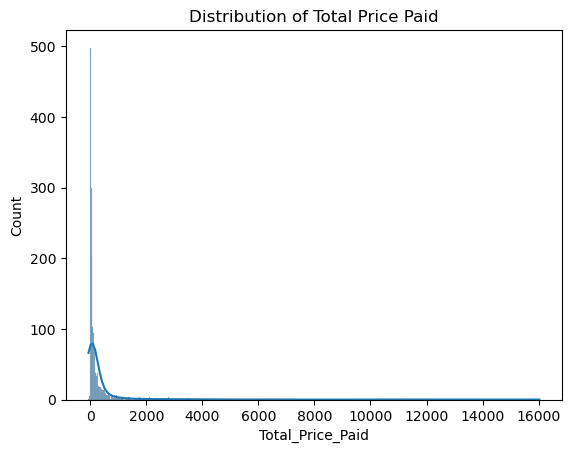

In [29]:
sns.histplot(df_cleaned['Total_Price_Paid'], kde=True)
plt.title('Distribution of Total Price Paid')
plt.show()

In [30]:
adventist_data = df_cleaned[df_cleaned['Health System Name'] == 'ADVENTIST HEALTHCARE, INC.']

In [31]:
adventist_data

,Health System Name,Supplier,Drug_Name,Dosage_mg,Total Units,Total_Price_Paid
0,"ADVENTIST HEALTHCARE, INC.",ACCORD HEALTHCA,CISPLATIN,50.0,2,12.54
1,"ADVENTIST HEALTHCARE, INC.",ACCORD HEALTHCA,CARBOPLATIN,150.0,1,7.56
2,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,50.0,1,4.39
3,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,50.0,4,29.16
4,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,150.0,6,50.16
5,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,450.0,6,129.66
6,"ADVENTIST HEALTHCARE, INC.",TEVA PARENTERAL,CARBOPLATIN,450.0,1,61.67
7,"ADVENTIST HEALTHCARE, INC.",ACCORD HEALTHCA,CISPLATIN,100.0,5,68.65
8,"ADVENTIST HEALTHCARE, INC.",APP/FRESENIUS K,CISPLATIN,50.0,1,18.05
9,"ADVENTIST HEALTHCARE, INC.",APP/FRESENIUS K,CISPLATIN,100.0,1,36.10
